Code for Question 3 (Most Valuable Players per Position)

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter, AutoMinorLocator)
pd.set_option('display.max_rows', None)

In [2]:
full_stats = pd.read_csv('/Users/stephenchen/Documents/W200/Project2_Wen_Chen_Ma_Koe/NBA_Player_data_comprehensive.csv')
full_stats = full_stats[(full_stats['MP'] > 12) & (full_stats['G'] > 20)]
full_stats.head()

,Player,Tm,Salary,Signed Using,Guaranteed,Pos,Age,G,GS,MP,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,GSW,43006362,Bird Rights,$88787328,PG,32.0,40.0,40.0,33.7,...,11.7,32.6,3.8,1.5,5.3,0.189,7.3,0.2,7.5,3.2
1,Russell Westbrook,WAS,41358814,Bird Rights,$85569960,PG,32.0,38.0,38.0,34.9,...,18.5,31.7,-0.6,1.6,0.9,0.032,1.7,0.0,1.7,1.3
2,Chris Paul,PHO,41358814,Bird Rights,$41358814,PG,35.0,44.0,44.0,31.9,...,14.7,22.3,3.4,2.1,5.5,0.183,2.3,1.3,3.6,2.0
3,John Wall,HOU,41254920,Bird Rights,$85565760,PG,30.0,32.0,32.0,31.8,...,14.3,31.6,-0.7,0.9,0.2,0.008,1.3,-1.7,-0.4,0.4
4,James Harden,BRK,40824000,Bird Rights,$84672000,PG-SG,31.0,40.0,40.0,38.2,...,16.7,28.9,5.1,1.6,6.7,0.210,6.2,0.4,6.6,3.3


In [3]:
pg = full_stats[full_stats['Pos'] == 'PG']
sg = full_stats[full_stats['Pos'] == 'SG']
sf = full_stats[full_stats['Pos'] == 'SF']
pf = full_stats[full_stats['Pos'] == 'PF']
c = full_stats[full_stats['Pos'] == 'C']

In [4]:
pg['AST:TOV'] = 0
pg = pg.reset_index(drop = True)
for i in range(pg.shape[0]):
    if pg.loc[i, 'TOV'] == 0:
        pg.loc[i, 'AST:TOV'] = pg.loc[i, 'AST'] / 1
    else:
        pg.loc[i, 'AST:TOV'] = pg.loc[i, 'AST'] / pg.loc[i, 'TOV']

<ipython-input-4-f946d6887473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pg['AST:TOV'] = 0


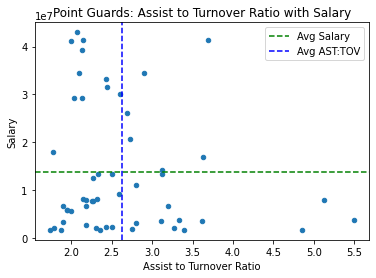

In [5]:
pg.sort_values(by = 'AST:TOV', ascending = False)[['Player','Tm','Salary','G','MP','AST','TOV','AST:TOV']].plot.scatter(x = 'AST:TOV', y = 'Salary')
plt.axhline(y = pg['Salary'].mean(), color = 'g', linestyle='--', label = 'Avg Salary')
plt.axvline(x = pg['AST:TOV'].mean(), color = 'b', linestyle = '--', label = 'Avg AST:TOV')
plt.xlabel('Assist to Turnover Ratio')
plt.title('Point Guards: Assist to Turnover Ratio with Salary')
plt.legend()
plt.show()

In [6]:
pg['AST:TOV / Salary'] = pg['AST:TOV'] / pg['Salary'] * 1000000
pg = pg.sort_values(by = 'AST:TOV', ascending = False).reset_index(drop = True)
pg[['Player','Tm','Salary','G','MP','AST','TOV','AST:TOV','AST:TOV / Salary']].head(10)

,Player,Tm,Salary,G,MP,AST,TOV,AST:TOV,AST:TOV / Salary
0,Kira Lewis Jr.,NOP,3640200,31.0,14.8,2.2,0.4,5.500000,1.510906
1,Tyus Jones,MEM,7965100,44.0,19.7,4.1,0.8,5.125000,0.643432
2,Monte Morris,DEN,1663861,36.0,27.2,3.4,0.7,4.857143,2.919200
3,Chris Paul,PHO,41358814,44.0,31.9,8.5,2.3,3.695652,0.089356
4,Ricky Rubio,MIN,17000000,45.0,26.4,6.9,1.9,3.631579,0.213622
5,T.J. McConnell,IND,3500000,42.0,25.2,6.5,1.8,3.611111,1.031746
6,Devonte' Graham,CHO,1663861,35.0,30.3,5.1,1.5,3.400000,2.043440
7,Tyrese Haliburton,SAC,3831840,41.0,30.2,5.0,1.5,3.333333,0.869904
8,Cameron Payne,PHO,1977011,34.0,16.9,3.6,1.1,3.272727,1.655392
9,D.J. Augustin,HOU,6666667,43.0,19.5,3.2,1.0,3.200000,0.480000


In [7]:
pg.sort_values(by = 'AST:TOV / Salary', ascending = False)[['Player','Tm','Salary','G','MP','AST','TOV','AST:TOV','AST:TOV / Salary']].head(10)

,Player,Tm,Salary,G,MP,AST,TOV,AST:TOV,AST:TOV / Salary
2,Monte Morris,DEN,1663861,36.0,27.2,3.4,0.7,4.857143,2.919200
6,Devonte' Graham,CHO,1663861,35.0,30.3,5.1,1.5,3.400000,2.043440
8,Cameron Payne,PHO,1977011,34.0,16.9,3.6,1.1,3.272727,1.655392
0,Kira Lewis Jr.,NOP,3640200,31.0,14.8,2.2,0.4,5.500000,1.510906
16,Raul Neto,WAS,1882867,40.0,20.5,2.2,0.8,2.750000,1.460539
26,Jalen Brunson,DAL,1663861,41.0,25.0,3.3,1.4,2.357143,1.416671
49,Bruce Brown,BRK,1663861,43.0,21.2,1.5,0.8,1.875000,1.126897
21,Brad Wanamaker,CHO,2250000,40.0,15.7,2.5,1.0,2.500000,1.111111
29,Immanuel Quickley,NYK,2105520,42.0,20.0,2.3,1.0,2.300000,1.092367
52,Kendrick Nunn,MIA,1663861,38.0,28.6,2.6,1.5,1.733333,1.041754


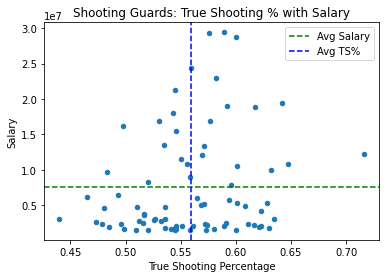

In [8]:
sg.sort_values(by = 'TS%', ascending = False)[['Player','Tm','Salary','G','MP','PTS','TS%']].plot.scatter(x = 'TS%', y = 'Salary')
plt.axhline(y=sg['Salary'].mean(), color = 'g', linestyle='--', label = 'Avg Salary')
plt.axvline(x = sg['TS%'].mean(), color = 'b', linestyle = '--', label = 'Avg TS%')
plt.xlabel('True Shooting Percentage')
plt.title('Shooting Guards: True Shooting % with Salary')
plt.legend()
plt.show()

In [9]:
sg = sg.reset_index(drop = True)
sg['TS% / Salary'] = sg['TS%'] / sg['Salary'] * 1000000
sg = sg.sort_values(by = 'TS%', ascending = False).reset_index(drop = True)
sg[['Player','Tm','Salary','G','MP','PTS','TS%','TS% / Salary']].head(10)

,Player,Tm,Salary,G,MP,PTS,TS%,TS% / Salary
0,Tony Snell,ATL,12178571,33.0,20.0,5.4,0.716,0.058792
1,Norman Powell,POR,10865952,44.0,30.5,19.5,0.647,0.059544
2,Zach LaVine,CHI,19500000,45.0,35.0,27.5,0.642,0.032923
3,Wayne Ellington,DET,3005225,34.0,23.2,10.6,0.635,0.211299
4,Tomáš Satoranský,CHI,10000000,34.0,22.6,7.9,0.632,0.063200
5,Damion Lee,GSW,1762796,46.0,18.8,6.6,0.630,0.357387
6,Luke Kennard,LAC,5273826,42.0,19.5,8.1,0.628,0.119079
7,Shai Gilgeous-Alexander,OKC,4141320,35.0,33.7,23.7,0.623,0.150435
8,Jordan Poole,GSW,2063280,26.0,17.2,11.0,0.623,0.301946
9,Desmond Bane,MEM,1936440,40.0,22.4,9.5,0.621,0.320692


In [10]:
sg.sort_values(by = 'TS% / Salary', ascending = False)[['Player','Tm','Salary','G','MP','PTS','TS%','TS% / Salary']].head(10)

,Player,Tm,Salary,G,MP,PTS,TS%,TS% / Salary
16,Javonte Green,CHI,1517981,27.0,13.6,4.0,0.600,0.395262
29,Terance Mann,LAC,1517984,45.0,17.6,6.1,0.573,0.377474
39,Jaylen Nowell,MIN,1517981,33.0,19.4,10.3,0.558,0.367594
47,Terence Davis,SAC,1517981,36.0,14.7,7.1,0.545,0.359030
5,Damion Lee,GSW,1762796,46.0,18.8,6.6,0.630,0.357387
25,Sterling Brown,HOU,1678854,44.0,24.2,7.8,0.580,0.345474
59,Talen Horton-Tucker,LAL,1517981,43.0,18.7,8.0,0.520,0.342560
66,Luguentz Dort,OKC,1517981,41.0,29.3,12.6,0.509,0.335314
48,Hamidou Diallo,DET,1663861,34.0,23.7,11.9,0.544,0.326950
50,Gary Trent Jr.,TOR,1663861,44.0,30.9,14.6,0.541,0.325147


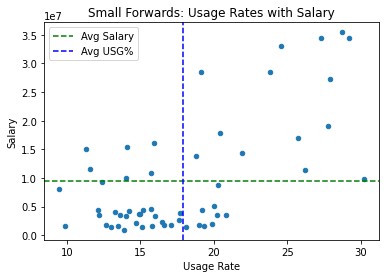

In [11]:
sf.sort_values(by = 'USG%', ascending = False)[['Player','Tm','Salary','G','MP','PTS','USG%']].plot.scatter(x = 'USG%', y = 'Salary')
plt.axhline(y = sf['Salary'].mean(), color = 'g', linestyle='--', label = 'Avg Salary')
plt.axvline(x = sf['USG%'].mean(), color = 'b', linestyle = '--', label = 'Avg USG%')
plt.xlabel('Usage Rate')
plt.title('Small Forwards: Usage Rates with Salary')
plt.legend()
plt.show()

In [12]:
sf = sf.reset_index(drop = True)
sf['USG% / Salary'] = sf['USG%'] / sf['Salary'] * 1000000
sf = sf.sort_values(by = 'USG%', ascending = False).reset_index(drop = True)
sf[['Player','Tm','Salary','G','MP','PTS','USG%','USG% / Salary']].head(10)

,Player,Tm,Salary,G,MP,PTS,USG%,USG% / Salary
0,Jayson Tatum,BOS,9897120,41.0,35.7,25.3,30.2,3.051393
1,Kawhi Leonard,LAC,34379100,39.0,34.5,25.9,29.2,0.849353
2,Paul George,LAC,35450412,36.0,33.5,22.5,28.7,0.809582
3,Brandon Ingram,NOP,27285000,46.0,34.4,23.8,27.9,1.022540
4,Jerami Grant,DET,19047619,43.0,35.1,22.6,27.8,1.459500
5,Jimmy Butler,MIA,34379100,32.0,33.6,21.5,27.3,0.794087
6,Dillon Brooks,MEM,11400000,41.0,29.2,16.1,26.2,2.298246
7,Evan Fournier,BOS,17000000,27.0,30.4,18.9,25.7,1.511765
8,Khris Middleton,MIL,33051724,45.0,33.4,20.4,24.6,0.744288
9,Gordon Hayward,CHO,28500000,41.0,34.4,19.8,23.8,0.835088


In [13]:
sf.sort_values(by = 'USG% / Salary', ascending = False)[['Player','Tm','Salary','G','MP','PTS','USG%','USG% / Salary']].head(10)

,Player,Tm,Salary,G,MP,PTS,USG%,USG% / Salary
42,Glenn Robinson III,SAC,930930,23.0,16.0,5.3,13.9,14.931305
22,Caleb Martin,CHO,1517981,31.0,13.9,5.1,18.1,11.923733
17,Sviatoslav Mykhailiuk,OKC,1663861,42.0,18.0,7.2,19.3,11.599527
20,Abdel Nader,PHO,1752950,24.0,14.8,6.7,19.0,10.838872
34,Jae'Sean Tate,HOU,1445967,46.0,28.6,10.6,15.1,10.442839
16,Keldon Johnson,SAS,2048040,41.0,28.9,13.3,19.9,9.716607
30,Duncan Robinson,MIA,1663861,47.0,32.7,12.7,15.8,9.495986
25,Timothé Luwawu-Cabarrot,BRK,1824003,40.0,19.4,6.9,17.1,9.374985
26,David Nwaba,HOU,1862250,30.0,22.6,9.2,16.6,8.913948
46,Cody Martin,CHO,1517981,33.0,13.7,4.0,13.0,8.564007


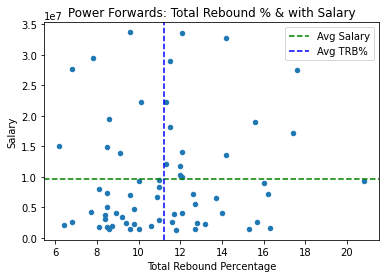

In [14]:
pf.sort_values(by = 'TRB%', ascending = False)[['Player','Tm','Salary','G','MP','PTS','TRB%']].plot.scatter(x = 'TRB%', y = 'Salary')
plt.axhline(y = pf['Salary'].mean(), color = 'g', linestyle='--', label = 'Avg Salary')
plt.axvline(x = pf['TRB%'].mean(), color = 'b', linestyle = '--', label = 'Avg TRB%')
plt.xlabel('Total Rebound Percentage')
plt.title('Power Forwards: Total Rebound % & with Salary')
plt.legend()
plt.show()

In [15]:
pf = pf.reset_index(drop = True)
pf['TRB% / Salary'] = pf['TRB%'] / pf['Salary'] * 1000000
pf = pf.sort_values(by = 'TRB%', ascending = False).reset_index(drop = True)
pf[['Player','Tm','Salary','G','MP','PTS','TRB%','TRB% / Salary']].head(10)

,Player,Tm,Salary,G,MP,PTS,TRB%,TRB% / Salary
0,Tristan Thompson,BOS,9258000,36.0,22.5,7.9,20.8,2.246706
1,Giannis Antetokounmpo,MIL,27528090,43.0,34.0,28.4,17.6,0.639347
2,Domantas Sabonis,IND,17187500,45.0,36.1,20.4,17.4,1.012364
3,Jarred Vanderbilt,MIN,1663861,44.0,17.8,5.5,16.3,9.796491
4,JaMychal Green,DEN,7199760,34.0,19.1,8.8,16.2,2.250075
5,Marvin Bagley III,SAC,8963640,37.0,25.7,13.9,16.0,1.784989
6,Precious Achiuwa,MIA,2582160,45.0,12.8,5.4,15.7,6.080181
7,Julius Randle,NYK,18900000,46.0,37.0,23.0,15.6,0.825397
8,Daniel Gafford,WAS,1517981,33.0,12.5,5.2,15.3,10.079178
9,Thaddeus Young,CHI,13545000,41.0,24.9,12.0,14.2,1.048357


In [16]:
pf.sort_values(by = 'TRB% / Salary', ascending = False)[['Player','Tm','Salary','G','MP','PTS','TRB%','TRB% / Salary']].head(10)

,Player,Tm,Salary,G,MP,PTS,TRB%,TRB% / Salary
8,Daniel Gafford,WAS,1517981,33.0,12.5,5.2,15.3,10.079178
3,Jarred Vanderbilt,MIN,1663861,44.0,17.8,5.5,16.3,9.796491
24,Xavier Tillman Sr.,MEM,1300000,34.0,18.6,6.3,11.8,9.076923
16,Isaiah Roby,OKC,1517981,40.0,23.3,9.0,12.7,8.366376
38,Dean Wade,CLE,1517981,39.0,14.3,4.5,10.0,6.587698
41,Eric Paschall,GSW,1517981,38.0,17.2,9.5,9.6,6.324190
6,Precious Achiuwa,MIA,2582160,45.0,12.8,5.4,15.7,6.080181
49,KZ Okpala,MIA,1517981,25.0,12.9,2.7,8.6,5.665420
13,Markieff Morris,LAL,2331593,41.0,18.7,6.3,13.2,5.661365
14,Darius Bazley,OKC,2399160,36.0,30.7,11.9,12.8,5.335201


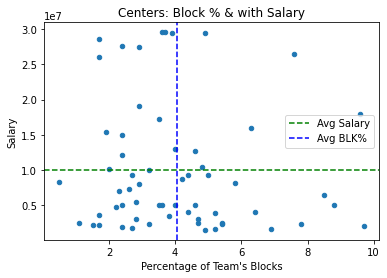

In [17]:
c.sort_values(by = 'BLK%', ascending = False)[['Player','Tm','Salary','G','MP','PTS','BLK%']].plot.scatter(x = 'BLK%', y = 'Salary')
plt.axhline(y = c['Salary'].mean(), color = 'g', linestyle='--', label = 'Avg Salary')
plt.axvline(x = c['BLK%'].mean(), color = 'b', linestyle = '--', label = 'Avg BLK%')
plt.xlabel('Percentage of Team\'s Blocks')
plt.title('Centers: Block % & with Salary')
plt.legend()
plt.show()

In [18]:
c = c.reset_index(drop = True)
c['BLK% / Salary'] = c['BLK%'] / c['Salary'] * 1000000
c = c.sort_values(by = 'BLK%', ascending = False).reset_index(drop = True)
c[['Player','Tm','Salary','G','MP','PTS','BLK%','BLK% / Salary']].head(10)

,Player,Tm,Salary,G,MP,PTS,BLK%,BLK% / Salary
0,Robert Williams,BOS,2029920,40.0,18.0,7.7,9.7,4.778513
1,Myles Turner,IND,18000000,42.0,31.0,12.7,9.6,0.533333
2,Nerlens Noel,NYK,5000000,41.0,22.8,5.0,8.8,1.760000
3,Chris Boucher,TOR,6490385,47.0,23.2,13.4,8.5,1.309630
4,Hassan Whiteside,SAC,2320044,28.0,14.9,8.0,7.8,3.362005
5,Rudy Gobert,UTA,26525281,46.0,30.7,14.7,7.6,0.286519
6,Drew Eubanks,SAS,1620564,27.0,13.0,4.6,6.9,4.257777
7,Alex Len,WAS,4032648,37.0,15.0,6.3,6.4,1.587047
8,Clint Capela,ATL,16000000,40.0,29.3,14.6,6.3,0.393750
9,Jakob Poeltl,SAS,8101852,44.0,24.7,7.7,5.8,0.715886


In [19]:
c.sort_values(by = 'BLK% / Salary', ascending = False)[['Player','Tm','Salary','G','MP','PTS','BLK%','BLK% / Salary']].head(10)

,Player,Tm,Salary,G,MP,PTS,BLK%,BLK% / Salary
0,Robert Williams,BOS,2029920,40.0,18.0,7.7,9.7,4.778513
6,Drew Eubanks,SAS,1620564,27.0,13.0,4.6,6.9,4.257777
4,Hassan Whiteside,SAC,2320044,28.0,14.9,8.0,7.8,3.362005
16,Naz Reid,MIN,1517981,45.0,19.2,11.0,4.9,3.227972
12,Mitchell Robinson,NYK,1663861,31.0,27.5,8.3,5.2,3.125261
10,Bismack Biyombo,CHO,2331593,43.0,21.7,5.4,5.4,2.316013
11,Marc Gasol,LAL,2564753,38.0,19.8,4.8,5.4,2.105466
18,Dwight Howard,PHI,2564753,46.0,17.1,6.7,4.7,1.832535
2,Nerlens Noel,NYK,5000000,41.0,22.8,5.0,8.8,1.760000
7,Alex Len,WAS,4032648,37.0,15.0,6.3,6.4,1.587047
